# Stock Prediction

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Load and visualize the data

In [2]:
data = pd.read_csv("reliance_data1r.csv") 
data.head()
df = data[['Close']]

Preprocess the data

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

Plot the closing prices

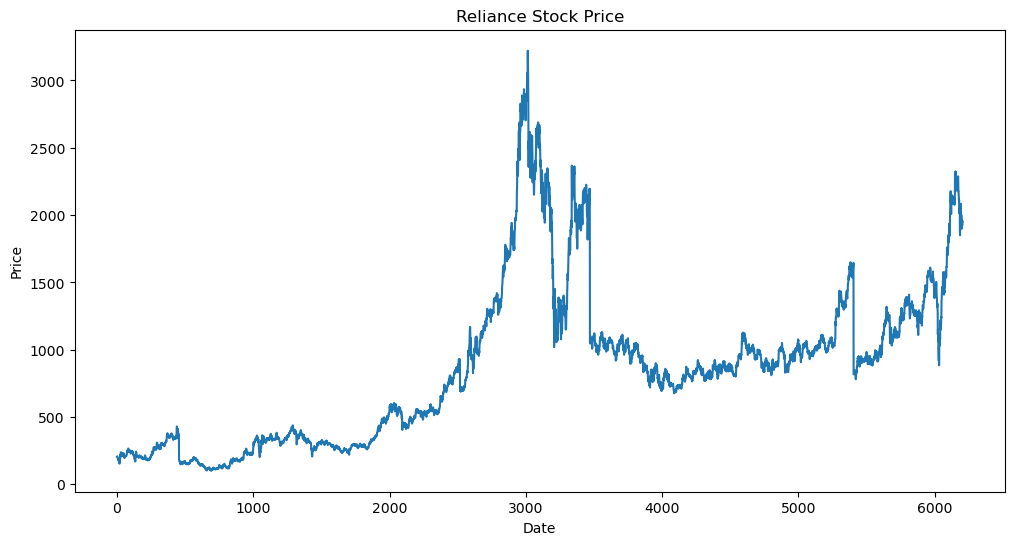

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'])
plt.title('Reliance Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Split the data into train and test sets

In [5]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

Function to create LSTM dataset

In [6]:
def create_lstm_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i + time_steps, 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

LSTM Dataset

In [7]:
time_steps = 10
X_train, y_train = create_lstm_dataset(train_data, time_steps)
X_test, y_test = create_lstm_dataset(test_data, time_steps)

Reshape the input data

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Reshape y_train

In [9]:
y_train = np.reshape(y_train, (y_train.shape[0], 1))

Building the Model

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

Training the Model

In [11]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
155/155 - 4s - loss: 0.0051 - 4s/epoch - 26ms/step
Epoch 2/50
155/155 - 1s - loss: 3.8781e-04 - 936ms/epoch - 6ms/step
Epoch 3/50
155/155 - 1s - loss: 3.6697e-04 - 929ms/epoch - 6ms/step
Epoch 4/50
155/155 - 1s - loss: 3.8008e-04 - 948ms/epoch - 6ms/step
Epoch 5/50
155/155 - 1s - loss: 3.7417e-04 - 934ms/epoch - 6ms/step
Epoch 6/50
155/155 - 1s - loss: 3.5552e-04 - 934ms/epoch - 6ms/step
Epoch 7/50
155/155 - 1s - loss: 3.3052e-04 - 967ms/epoch - 6ms/step
Epoch 8/50
155/155 - 1s - loss: 3.3296e-04 - 951ms/epoch - 6ms/step
Epoch 9/50
155/155 - 1s - loss: 2.9937e-04 - 935ms/epoch - 6ms/step
Epoch 10/50
155/155 - 1s - loss: 2.6868e-04 - 933ms/epoch - 6ms/step
Epoch 11/50
155/155 - 1s - loss: 2.5360e-04 - 934ms/epoch - 6ms/step
Epoch 12/50
155/155 - 1s - loss: 2.5763e-04 - 948ms/epoch - 6ms/step
Epoch 13/50
155/155 - 1s - loss: 2.8487e-04 - 1s/epoch - 7ms/step
Epoch 14/50
155/155 - 1s - loss: 2.2333e-04 - 1s/epoch - 7ms/step
Epoch 15/50
155/155 - 1s - loss: 2.1763e-04 - 1s/epoch 

Predictions on the test data

In [12]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

39/39 [==============================] - 1s 3ms/step


In [13]:
dates = data.index[train_size+2:train_size+2+len(predictions)]

Actual and Predicted Prices

C:\Users\oscur\AppData\Local\Temp\ipykernel_11236\2920271579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predictions'][train_size + time_steps:] = predictions.flatten()


<Axes: >

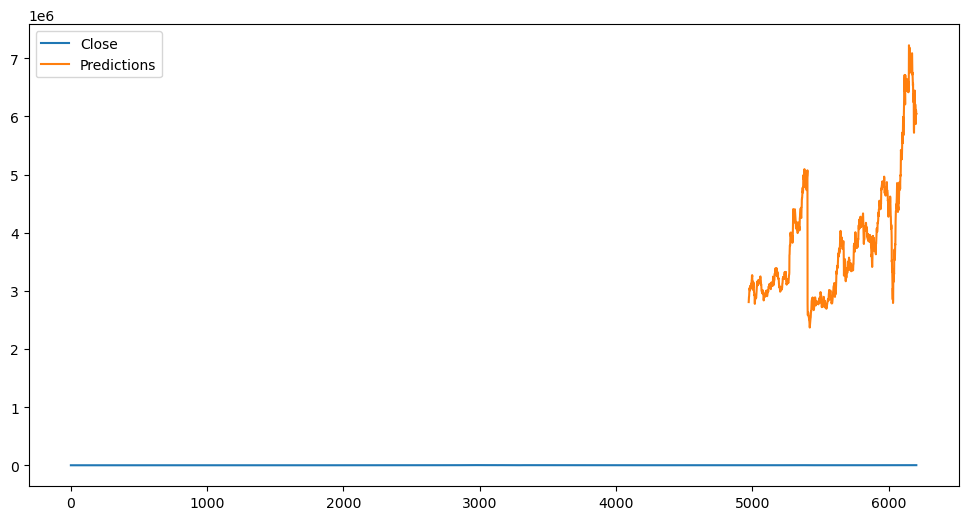

In [14]:
data['Predictions'] = np.nan
data['Predictions'][train_size + time_steps:] = predictions.flatten()
data[['Close', 'Predictions']].plot(figsize=(12, 6))

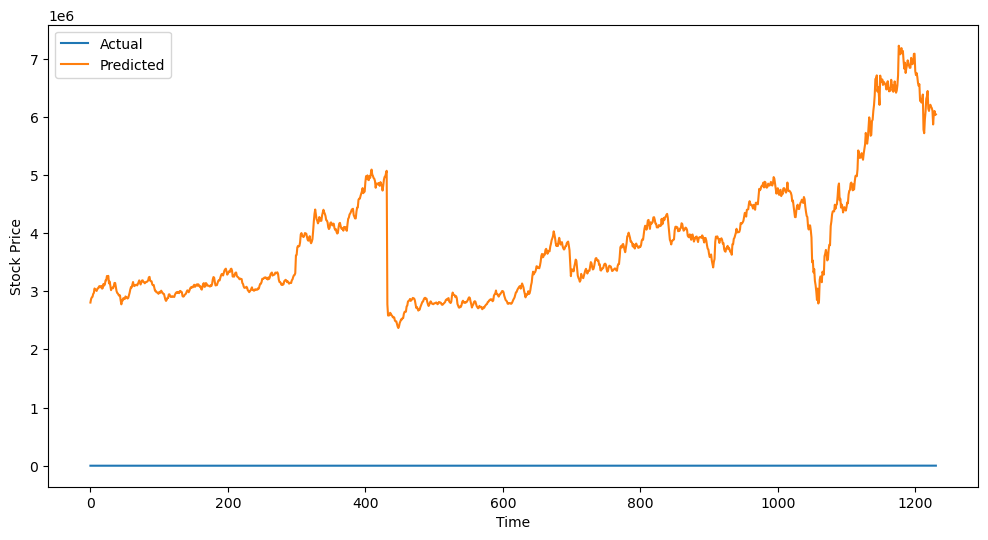

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'].values[train_size+time_steps:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()